In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 2.5 MB/s eta 0:00:00


In [3]:
#Import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix
from sklearn.metrics import hamming_loss, mean_squared_error
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from skopt import BayesSearchCV
import sklearn.metrics as metrics
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree

from joblib import dump, load
import joblib

import warnings

# Loading the Data 

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Feature(CREMA-D only).csv to Feature(CREMA-D only).csv


In [5]:
AudioData = pd.read_csv('Feature(CREMA-D only).csv')
AudioData.head(10)

,ID,Gender,Phrase,Emotion,Level,0,1,2,3,4,...,159,160,161,162,163,164,165,166,167,168
0,1001,Male,DFA,ANG,XX,0.085690,0.671934,0.694386,0.672386,0.675260,...,4.833769e-08,4.774562e-08,4.738036e-08,20.236447,12.717658,17.725536,16.395970,19.851038,18.746176,64.114904
1,1001,Male,DFA,DIS,XX,0.078444,0.718596,0.729192,0.653268,0.665332,...,3.278495e-07,3.231356e-07,3.202182e-07,19.544465,13.033411,16.184696,14.940196,18.819783,17.493382,65.144855
2,1001,Male,DFA,FEA,XX,0.071806,0.576044,0.606729,0.631089,0.654011,...,2.048362e-06,2.016054e-06,1.996248e-06,20.332696,15.057014,17.835584,16.478764,19.712501,17.948928,63.113899
3,1001,Male,DFA,HAP,XX,0.069309,0.666179,0.677285,0.701381,0.676417,...,1.185680e-07,1.169627e-07,1.159695e-07,19.320487,14.540849,16.938015,15.095720,19.876366,17.662157,62.585219
4,1001,Male,DFA,SAD,XX,0.069696,0.697295,0.710469,0.657157,0.680874,...,6.190247e-08,6.069696e-08,5.997680e-08,20.679260,12.612233,16.869543,15.638160,19.075156,17.443968,62.328887
5,1001,Male,IEO,ANG,HI,0.085399,0.731783,0.705474,0.655245,0.697538,...,4.440905e-10,3.050494e-10,2.443161e-10,21.608573,14.203830,15.465481,16.310677,17.360934,19.369430,61.630846
6,1001,Male,IEO,ANG,LO,0.060799,0.681063,0.762744,0.686531,0.627263,...,2.413502e-07,2.361666e-07,2.330079e-07,20.670911,14.087468,16.431122,15.596296,17.138782,18.339009,62.852686
7,1001,Male,IEO,ANG,MD,0.088101,0.633072,0.728924,0.615463,0.631576,...,5.227260e-08,5.157755e-08,5.114884e-08,20.730469,13.949370,16.988008,17.081541,17.640648,19.890205,64.127160
8,1001,Male,IEO,DIS,HI,0.075299,0.748065,0.721715,0.664321,0.685191,...,5.853904e-07,5.781187e-07,5.736204e-07,19.519801,13.420722,15.089459,14.876512,17.077736,18.584577,61.065492
9,1001,Male,IEO,DIS,LO,0.056497,0.642570,0.767242,0.731489,0.688408,...,1.271075e-08,1.254586e-08,1.244376e-08,18.521050,13.716452,14.391508,14.402355,15.818562,15.091575,66.016829


In [6]:
AudioData['Emotion'] = AudioData['Emotion'].map({'ANG':0, 'DIS':1, 'FEA':2, 'HAP':3, 'SAD':4}).astype(int)

In [7]:
trainingdata = AudioData.groupby('Emotion', group_keys=False).apply(lambda x: x.sample(frac=0.8, random_state = 8))
#Splitting the data 80-20 as common convention

X_tr = trainingdata.drop(['Emotion','ID','Phrase','Level','Gender'],axis=1) 
Y_tr = trainingdata['Emotion']
display(trainingdata)

,ID,Gender,Phrase,Emotion,Level,0,1,2,3,4,...,159,160,161,162,163,164,165,166,167,168
4240,1061,Female,TIE,0,XX,0.092984,0.549817,0.611623,0.687982,0.697771,...,4.536062e-08,4.482391e-08,4.449004e-08,12.856300,14.133843,16.731343,15.926818,19.042409,16.670546,66.658294
1495,1022,Male,IWW,0,XX,0.095064,0.601489,0.634199,0.666352,0.666341,...,4.634562e-06,4.579482e-06,4.545280e-06,14.401822,15.138085,17.840835,15.760194,16.548973,18.634105,63.236641
4675,1068,Male,DFA,0,XX,0.100892,0.632757,0.585611,0.544353,0.566851,...,1.164445e-07,1.148812e-07,1.139178e-07,14.589349,14.951891,16.551429,16.432319,16.420636,19.171307,64.771895
465,1007,Female,MTI,0,XX,0.046391,0.551361,0.651996,0.538148,0.442255,...,1.610517e-08,1.591140e-08,1.579087e-08,15.117342,16.051220,20.291125,18.215276,17.278931,18.252559,64.681422
425,1007,Female,IEO,0,HI,0.094824,0.436353,0.493700,0.461670,0.464479,...,6.427509e-06,6.343494e-06,6.291860e-06,10.968436,16.262664,20.853624,20.236874,20.839699,19.218847,64.509126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,1002,Female,TSI,4,XX,0.147467,0.670932,0.631001,0.614588,0.556513,...,4.474506e-09,4.374929e-09,4.314780e-09,18.603013,13.566217,14.841158,14.001113,17.225641,16.357808,69.486127
3854,1056,Female,IEO,4,MD,0.040220,0.732324,0.644727,0.611816,0.608792,...,3.116007e-08,3.078227e-08,3.054755e-08,12.399413,13.372501,16.027363,15.032232,16.550457,15.830667,66.051287
889,1013,Female,TIE,4,XX,0.051916,0.631124,0.654439,0.592879,0.605226,...,8.369178e-09,8.262509e-09,8.196593e-09,13.998738,14.602503,16.924629,16.151056,16.821118,15.986578,66.465609
2229,1033,Male,DFA,4,XX,0.054410,0.641013,0.636335,0.618423,0.644051,...,1.146592e-07,1.133971e-07,1.126104e-07,13.346250,13.374808,14.701561,15.285460,17.429611,16.415108,64.993709


In [8]:
testingdata = AudioData[~AudioData.index.isin(trainingdata.index)]

X_te = testingdata.drop(['Emotion','ID','Phrase','Level','Gender'],axis=1)
Y_te = testingdata['Emotion']

In [ ]:
display(X_te)

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
6,0.060799,0.681063,0.762744,0.686531,0.627263,0.614043,0.568332,0.593469,0.610406,0.679264,...,2.413502e-07,2.361666e-07,2.330079e-07,20.670911,14.087468,16.431122,15.596296,17.138782,18.339009,62.852686
9,0.056497,0.642570,0.767242,0.731489,0.688408,0.709037,0.668679,0.625248,0.624790,0.683544,...,1.271075e-08,1.254586e-08,1.244376e-08,18.521050,13.716452,14.391508,14.402355,15.818562,15.091575,66.016829
12,0.062369,0.762812,0.832317,0.698373,0.700082,0.653495,0.634656,0.570931,0.628753,0.654432,...,1.236244e-07,1.221700e-07,1.212621e-07,20.166248,13.995979,14.764143,14.675896,16.354697,16.294236,64.170398
15,0.053182,0.708044,0.783436,0.746871,0.679744,0.671686,0.641620,0.627159,0.614944,0.728322,...,5.452708e-08,5.397671e-08,5.363603e-08,18.582521,14.204428,15.595939,14.097221,15.553017,16.873162,63.595638
18,0.071246,0.694037,0.740965,0.686981,0.693227,0.669359,0.583588,0.581601,0.665594,0.745063,...,4.304763e-08,4.264189e-08,4.238683e-08,20.105102,13.342502,16.841665,15.066975,17.217753,16.171984,64.899184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6325,0.094494,0.549485,0.677346,0.664106,0.561557,0.533191,0.542033,0.590043,0.622899,0.665553,...,3.703025e-06,3.652796e-06,3.621733e-06,15.112770,15.770000,18.633352,16.535497,17.586309,17.338107,66.286477
6326,0.075768,0.534870,0.565601,0.519987,0.497438,0.583568,0.608708,0.635385,0.671491,0.682680,...,5.315962e-10,5.251048e-10,5.210796e-10,15.220033,15.097523,17.396265,15.777923,18.560719,16.827558,66.725918
6327,0.070458,0.528276,0.488441,0.448189,0.502351,0.519598,0.574609,0.607989,0.681938,0.805898,...,3.500149e-09,3.447546e-09,3.415276e-09,16.414942,15.916192,17.841749,16.112221,18.915954,18.449106,67.792814
6328,0.076871,0.544311,0.574740,0.533077,0.561477,0.595797,0.614349,0.615048,0.610039,0.670135,...,5.495296e-10,5.385943e-10,5.319497e-10,16.526519,14.501675,17.304937,15.806878,18.536499,17.017114,66.704363


In [ ]:
display(Y_te)

6       0
9       1
12      2
15      3
18      4
       ..
6325    0
6326    1
6327    2
6328    3
6329    4
Name: Emotion, Length: 1270, dtype: int64

In [9]:
scaler = StandardScaler()

X_te_transformed = scaler.fit_transform(X_te) 
X_tr_transformed = scaler.transform(X_tr)

#Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#Reference: https://towardsdatascience.com/multiclass-classification-using-k-nearest-neighbours-ca5281a9ef76

# Cluster Based Modelling

kNN and k-Means will be both implemented to determine if a bottom-up or top-down approach is applicable for this data set. 

## kNN Model Building

In [ ]:
n_neighbours = np.arange(1, 73,2) #To avoid having an even number of neighbours

n_repeats = 200
accs_val = np.zeros((n_repeats, len(n_neighbours)))

for i in tqdm(range(n_repeats)):
    x_tr_2, x_val, y_tr_2, y_val = train_test_split(X_tr_transformed, Y_tr, test_size=0.2)  
    for j, k in enumerate(n_neighbours):
        model = KNeighborsClassifier(n_neighbors=k, weights='distance')
        model.fit(x_tr_2, y_tr_2)
        accs_val[i, j] = accuracy_score(y_val, model.predict(x_val)) 

scores = accs_val.mean(axis=0)
optimal_k = n_neighbours[np.argmax(scores)]
print(optimal_k)

  0%|          | 0/200 [00:00<?, ?it/s]

39


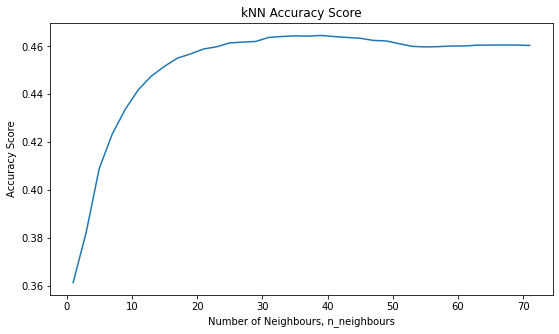

In [ ]:
fig = plt.figure()
fig.set_size_inches(9,5)
plt.title("kNN Accuracy Score", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=10)
plt.xlabel("Number of Neighbours, n_neighbours",fontsize=10)
plt.plot(n_neighbours, scores)
plt.show()

In [11]:
model = KNeighborsClassifier(n_neighbors=39, weights='distance')
model.fit(X_tr_transformed, Y_tr)
Y_predictedkNN = model.predict(X_te_transformed)
H_kNN = hamming_loss(Y_te,Y_predictedkNN)
AccScore_kNN = accuracy_score(Y_te, Y_predictedkNN)
MSE_kNN = mean_squared_error(Y_te, Y_predictedkNN)
print("The Hamming Loss is: " + str(round(H_kNN,4))) #Rounding the output to 4 decimal places for easier presentation
print("The accuracy score is: " + str(round(AccScore_kNN*100,2)))
print("THE MSE is: " + str(round(MSE_kNN,4)))

#Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html

The Hamming Loss is: 0.4976
The accuracy score is: 50.24
THE MSE is: 2.3638


### Dimensionality Reduction

In [ ]:
model = make_pipeline(PCA(), KNeighborsClassifier(n_neighbors=39, weights='distance'))

param_grid = {
    "pca__n_components": np.arange(1, 100),
    "kneighborsclassifier__p": [1,2]
}

search = GridSearchCV(model, param_grid=param_grid, scoring="accuracy", cv=10)
search.fit(X_tr_transformed, Y_tr)
print(search.best_estimator_.get_params())

#Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#Reference: https://stackoverflow.com/questions/72549766/why-does-sklearns-best-estimator-not-return-all-of-the-variables-xgboost

{'memory': None, 'steps': [('pca', PCA(n_components=91)), ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=39, p=1, weights='distance'))], 'verbose': False, 'pca': PCA(n_components=91), 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=39, p=1, weights='distance'), 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 91, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__leaf_size': 30, 'kneighborsclassifier__metric': 'minkowski', 'kneighborsclassifier__metric_params': None, 'kneighborsclassifier__n_jobs': None, 'kneighborsclassifier__n_neighbors': 39, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}


In [12]:
model_updated = make_pipeline(PCA(n_components=91), KNeighborsClassifier(n_neighbors=39, weights='distance',p=1))
#Optimal p for kNN is NOT still 2 (euclidean_distance)
model_updated.fit(X_tr_transformed, Y_tr)
Y_predictedkNN = model_updated.predict(X_te_transformed)
H_kNN = hamming_loss(Y_te,Y_predictedkNN)
AccScore_kNN = accuracy_score(Y_te, Y_predictedkNN)
MSE_kNN = mean_squared_error(Y_te, Y_predictedkNN)
print("The Hamming Loss is: " + str(round(H_kNN,4))) #Rounding the output to 4 decimal places for easier presentation
print("The accuracy score is: " + str(round(AccScore_kNN*100,2)))
print("THE MSE is: " + str(round(MSE_kNN,4)))

The Hamming Loss is: 0.4953
The accuracy score is: 50.47
THE MSE is: 2.3071


## k Means Comparison

Testing if this unsupervised method results in the same conclusion as kNN.

In [14]:
kmeans_df = AudioData.drop(['Emotion','ID','Phrase','Level','Gender'],axis=1) 
display(kmeans_df)

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,0.085690,0.671934,0.694386,0.672386,0.675260,0.674322,0.579565,0.578604,0.647424,0.650719,...,4.833769e-08,4.774562e-08,4.738036e-08,20.236447,12.717658,17.725536,16.395970,19.851038,18.746176,64.114904
1,0.078444,0.718596,0.729192,0.653268,0.665332,0.687527,0.602966,0.577669,0.618406,0.681478,...,3.278495e-07,3.231356e-07,3.202182e-07,19.544465,13.033411,16.184696,14.940196,18.819783,17.493382,65.144855
2,0.071806,0.576044,0.606729,0.631089,0.654011,0.615403,0.571089,0.554196,0.630819,0.666309,...,2.048362e-06,2.016054e-06,1.996248e-06,20.332696,15.057014,17.835584,16.478764,19.712501,17.948928,63.113899
3,0.069309,0.666179,0.677285,0.701381,0.676417,0.659513,0.630201,0.582889,0.567919,0.673455,...,1.185680e-07,1.169627e-07,1.159695e-07,19.320487,14.540849,16.938015,15.095720,19.876366,17.662157,62.585219
4,0.069696,0.697295,0.710469,0.657157,0.680874,0.675752,0.616896,0.581852,0.673936,0.778380,...,6.190247e-08,6.069696e-08,5.997680e-08,20.679260,12.612233,16.869543,15.638160,19.075156,17.443968,62.328887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,0.114518,0.587432,0.625285,0.559025,0.530899,0.582621,0.590750,0.696646,0.720174,0.689990,...,1.455467e-08,1.393272e-08,1.356538e-08,17.970945,15.397158,16.427824,16.965998,17.989314,17.473032,68.055226
6351,0.066478,0.591427,0.572732,0.558411,0.564348,0.614273,0.684132,0.664140,0.684727,0.775005,...,1.854230e-09,1.844318e-09,1.837963e-09,16.775219,14.104081,15.905302,16.261985,17.625420,16.952061,67.380123
6352,0.087736,0.515751,0.512463,0.514055,0.513658,0.587177,0.629450,0.699794,0.787597,0.812950,...,3.920627e-10,3.877069e-10,3.850097e-10,18.002724,15.550379,16.384595,15.627693,17.630192,17.117918,68.745353
6353,0.129660,0.434935,0.465356,0.475787,0.471286,0.521731,0.539943,0.611939,0.690907,0.717095,...,5.890358e-09,5.813106e-09,5.765292e-09,17.159134,14.972380,17.922721,16.988440,18.537291,18.036333,66.545819


In [15]:
kmeans_df_transformed = scaler.fit_transform(kmeans_df)
display(kmeans_df_transformed)

array([[ 0.60938291,  1.02323958,  0.98917025, ...,  1.72046874,
         0.85965861, -0.56430252],
       [ 0.35276035,  1.60502513,  1.39892997, ...,  0.9832774 ,
         0.09878012, -0.06233092],
       [ 0.11767269, -0.17231152, -0.04276843, ...,  1.62143594,
         0.37545412, -1.0521665 ],
       ...,
       [ 0.68183604, -0.92404735, -1.15252114, ...,  0.13290064,
        -0.12925608,  1.69245929],
       [ 2.16661973, -1.93165762, -1.70709367, ...,  0.78133892,
         0.42853897,  0.62046301],
       [-0.02927922, -1.22387205, -1.3670939 , ...,  0.51548355,
        -0.21075092,  1.29022293]])

In [16]:
pca = PCA(n_components=91) #To match with kNN specifications
principalComponents = pca.fit_transform(kmeans_df_transformed)

pca_df = pd.DataFrame(data = principalComponents)
pca_df.head()
#Reference: https://machinelearningknowledge.ai/tutorial-for-k-means-clustering-in-python-sklearn/#:~:text=Step%2D1%3ATo%20decide%20the,new%20centroid%20for%20every%20cluster

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,-0.393929,-0.635701,0.159582,-0.212533,-1.492240,2.500306,2.716390,-3.862157,-0.846121,2.179479,...,0.061517,-0.185156,-0.227578,0.307914,-0.324569,-0.084850,0.327532,0.421378,-0.112305,0.367215
1,-2.499599,-1.052826,1.507742,-0.961677,-1.251942,2.484388,2.063042,-2.399069,-0.356067,0.911558,...,0.134768,-0.009537,-0.164349,0.268373,-0.112114,-0.091992,0.009158,0.209603,-0.047859,0.163936
2,2.358469,0.673091,-0.355423,1.099284,-1.658744,2.709408,1.520803,-2.966755,-2.222371,2.373722,...,-0.285754,-0.517970,-0.237538,-0.345741,0.038530,0.121237,-0.222806,0.717353,0.182657,0.367843
3,-0.100417,-0.634760,0.236095,-0.068123,-1.494156,3.255417,2.282923,-4.281610,-0.093206,1.848345,...,0.058944,-0.413001,0.169614,0.026653,-0.104485,0.339545,-0.147406,0.290888,-0.254410,-0.015822
4,-2.763262,-1.155812,1.523463,-1.185349,-1.319180,1.808227,1.812729,-2.726806,-0.638135,1.358880,...,-0.150312,-0.176873,0.040943,0.410950,-0.578526,-0.064399,0.088709,0.710659,-0.401767,-0.112871


In [17]:
pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(kmeans_df_transformed)

pca_df2 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
pca_df2.head()

,principal component 1,principal component 2
0,-0.393929,-0.635674
1,-2.499599,-1.052811
2,2.358469,0.673113
3,-0.100417,-0.634743
4,-2.763262,-1.155794


### Elbow Method

This set of calculations is done with the number of principal components equivaluent to kNN.

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

K=np.arange(1, 73,2) #To avoid having an even number of neighbours
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(pca_df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

#Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#Reference: https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning

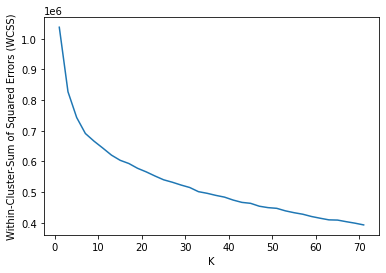

In [ ]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WCSS)')
plt.plot(K,wss)

It appears the elbow is around K=11. 

In [18]:
warnings.simplefilter(action='ignore', category=FutureWarning)

kmeans = cluster.KMeans(n_clusters=11)
kmeans = kmeans.fit(pca_df)

In [19]:
H_kM1 = hamming_loss(AudioData['Emotion'],kmeans.labels_)
AccScore_kM1 = accuracy_score(AudioData['Emotion'],kmeans.labels_)
MSE_kM1 = mean_squared_error(AudioData['Emotion'],kmeans.labels_)
print("The Hamming Loss is: " + str(round(H_kM1,4))) #Rounding the output to 4 decimal places for easier presentation
print("The accuracy score is: " + str(round(AccScore_kM1*100,2)))
print("THE MSE is: " + str(round(MSE_kM1,4)))

The Hamming Loss is: 0.8121
The accuracy score is: 18.79
THE MSE is: 8.8804


This set of calculations is done with 2 principal components, for ease of visualization.

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

K=np.arange(1, 73,2) #To avoid having an even number of neighbours
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(pca_df2)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

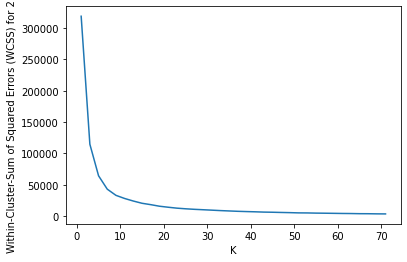

In [ ]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WCSS) for 2 PCs')
plt.plot(K,wss)

It appears the elbow is at K=9.

In [20]:
warnings.simplefilter(action='ignore', category=FutureWarning)

kmeans = cluster.KMeans(n_clusters=9)
kmeans = kmeans.fit(pca_df2)

In [21]:
H_kM2 = hamming_loss(AudioData['Emotion'],kmeans.labels_)
AccScore_kM2 = accuracy_score(AudioData['Emotion'],kmeans.labels_)
MSE_kM2 = mean_squared_error(AudioData['Emotion'],kmeans.labels_)
print("The Hamming Loss is: " + str(round(H_kM2,4))) #Rounding the output to 4 decimal places for easier presentation
print("The accuracy score is: " + str(round(AccScore_kM2*100,2)))
print("THE MSE is: " + str(round(MSE_kM2,4)))

The Hamming Loss is: 0.8318
The accuracy score is: 16.82
THE MSE is: 12.0323


In [ ]:
pca_df2['Clusters'] = kmeans.labels_
display(pca_df2)

,principal component 1,principal component 2,Clusters
0,-0.393929,-0.635656,0
1,-2.499599,-1.052783,1
2,2.358469,0.673154,5
3,-0.100417,-0.634700,0
4,-2.763262,-1.155769,1
...,...,...,...
6350,-1.671247,-1.135957,1
6351,-3.154187,-1.607842,1
6352,-2.568002,-2.026343,1
6353,-1.375727,-0.732463,0


In [ ]:
np.unique(pca_df2['Clusters'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [ ]:
pca_df2['Clusters'].value_counts()

1    2684
0    2236
5     801
3     336
6     152
8      54
2      54
7      26
4      12
Name: Clusters, dtype: int64

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

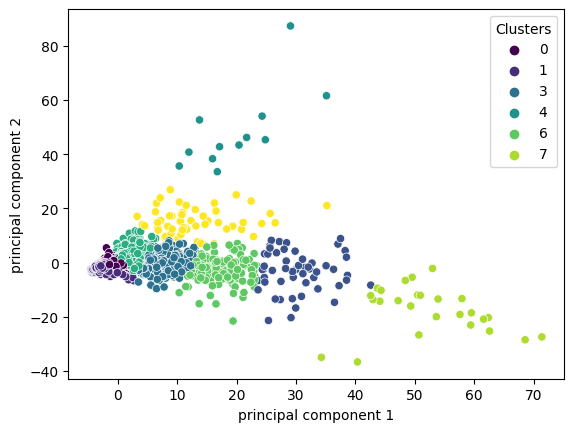

In [ ]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue = "Clusters",  data=pca_df2, palette='viridis')

### Silhouette Method

This set of calculations is done with the number of principal components equivaluent to kNN.

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

dicts = {}

for i in range(2,73,2):
  labels=cluster.KMeans(n_clusters=i,random_state=8).fit(pca_df).labels_
  score = metrics.silhouette_score(pca_df,labels,metric="euclidean",random_state=8)
  dicts[i] = score

print(dicts)

#Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

{2: 0.6985321778130188, 4: 0.1948013109948024, 6: 0.1410690396869771, 8: 0.11436562240844074, 10: 0.07604031580507374, 12: 0.06535459599503615, 14: 0.058803190361448196, 16: 0.0573480376447993, 18: 0.0625571159013468, 20: 0.054481109109319935, 22: 0.05420545562457902, 24: 0.0515693644126555, 26: 0.0601970603596073, 28: 0.05686164589618455, 30: 0.04165413384125227, 32: 0.036400573328153246, 34: 0.031927690791238514, 36: 0.055186032783498706, 38: 0.030421544510831355, 40: 0.049369870075670716, 42: 0.053048662132129096, 44: 0.033257836477240024, 46: 0.0281025854966809, 48: 0.02664264050086953, 50: 0.028469855046393214, 52: 0.0322362853530578, 54: 0.037014914848336467, 56: 0.030015324339724692, 58: 0.04591562680860136, 60: 0.027665120022693127, 62: 0.0353760375241255, 64: 0.02877152588594157, 66: 0.029845818246782882, 68: 0.03256284112733752, 70: 0.03099589278653969, 72: 0.03390660450019532}


In [ ]:
best_silvalue = max(dicts.values())
print(best_silvalue)

0.6985321778130188


In [ ]:
keys = [k for k, v in dicts.items() if v == best_silvalue]
print(keys)

[2]


In [22]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans = kmeans.fit(pca_df)

In [23]:
H_kM3 = hamming_loss(AudioData['Emotion'],kmeans.labels_)
AccScore_kM3 = accuracy_score(AudioData['Emotion'],kmeans.labels_)
MSE_kM3 = mean_squared_error(AudioData['Emotion'],kmeans.labels_)
print("The Hamming Loss is: " + str(round(H_kM3,4))) #Rounding the output to 4 decimal places for easier presentation
print("The accuracy score is: " + str(round(AccScore_kM3*100,2)))
print("THE MSE is: " + str(round(MSE_kM3,4)))

The Hamming Loss is: 0.7608
The accuracy score is: 23.92
THE MSE is: 3.0022


This set of calculations is done with 2 principal components, for ease of visualization.

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

dicts = {}

for i in range(2,73,2):
  labels=cluster.KMeans(n_clusters=i,random_state=8).fit(pca_df2).labels_
  score = metrics.silhouette_score(pca_df2,labels,metric="euclidean",random_state=8)
  dicts[i] = score

print(dicts)

#Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

{2: 0.82144963595753, 4: 0.743445438340418, 6: 0.47896778732381834, 8: 0.47251131015483977, 10: 0.4311159925238126, 12: 0.4142965274051637, 14: 0.4200655025648136, 16: 0.41317475280759886, 18: 0.3916877650644152, 20: 0.3931209485786409, 22: 0.3782561562372735, 24: 0.39688925376131906, 26: 0.3748968502548843, 28: 0.3670125041612622, 30: 0.36521452545914157, 32: 0.3609083709273042, 34: 0.3547849394414034, 36: 0.3682871701195878, 38: 0.3382857475982259, 40: 0.3660951395893152, 42: 0.3362459621778222, 44: 0.34818458324755613, 46: 0.3601138493863791, 48: 0.3624004787902487, 50: 0.35289070391684896, 52: 0.36574704618214887, 54: 0.3522089394424808, 56: 0.35320587240169005, 58: 0.3312222807984572, 60: 0.35024835051944453, 62: 0.36488524535196937, 64: 0.33951632914059426, 66: 0.34289897233340694, 68: 0.3474085917245882, 70: 0.3506757280639995, 72: 0.3410768599058292}


In [ ]:
best_silvalue = max(dicts.values())
print(best_silvalue)

0.82144963595753


In [ ]:
keys = [k for k, v in dicts.items() if v == best_silvalue]
print(keys)
#Reference: https://note.nkmk.me/en/python-dict-get-key-from-value/

[2]


In [24]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans = kmeans.fit(pca_df2)

In [25]:
H_kM4 = hamming_loss(AudioData['Emotion'],kmeans.labels_)
AccScore_kM4 = accuracy_score(AudioData['Emotion'],kmeans.labels_)
MSE_kM4 = mean_squared_error(AudioData['Emotion'],kmeans.labels_)
print("The Hamming Loss is: " + str(round(H_kM4,4))) #Rounding the output to 4 decimal places for easier presentation
print("The accuracy score is: " + str(round(AccScore_kM4*100,2)))
print("THE MSE is: " + str(round(MSE_kM4,4)))

The Hamming Loss is: 0.8397
The accuracy score is: 16.03
THE MSE is: 5.998


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

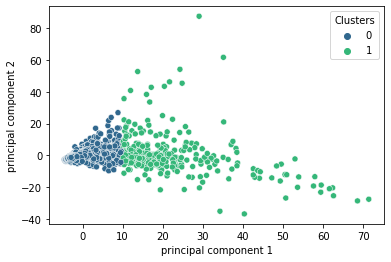

In [ ]:
pca_df2['Clusters'] = kmeans.labels_

sns.scatterplot(x="principal component 1", y="principal component 2",hue = 'Clusters',  data=pca_df2,palette='viridis')

The below applies a sample size of 1000 - to see if this alters the outcome. 

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

dicts = {}

for i in range(2,73,2):
  labels=cluster.KMeans(n_clusters=i,random_state=8).fit(pca_df2).labels_
  score = metrics.silhouette_score(pca_df2,labels,metric="euclidean",sample_size=1000,random_state=8)
  dicts[i] = score

print(dicts)

{2: 0.8094300158753506, 4: 0.7390270588792698, 6: 0.4863792386323171, 8: 0.47191942465649306, 10: 0.43210697080496935, 12: 0.40757864824796797, 14: 0.41697080972130746, 16: 0.3987761199110656, 18: 0.40162174310357207, 20: 0.39446850541210116, 22: 0.3897913837985693, 24: 0.38994161248503123, 26: 0.3744527063468697, 28: 0.33761522428870344, 30: 0.3436964564927085, 32: 0.3680931288712214, 34: 0.34931655759184244, 36: 0.3928372658063486, 38: 0.36770943502848447, 40: 0.35422166193796933, 42: 0.38886542845096767, 44: 0.36125127989761774, 46: 0.35568955854990086, 48: 0.343255077952419, 50: 0.3416827703889088, 52: 0.3554211506459298, 54: 0.34349564089246776, 56: 0.35610120870626033, 58: 0.35913883633066734, 60: 0.33009018645730476, 62: 0.361146639441772, 64: 0.3502955959570392, 66: 0.3455441298149219, 68: 0.36051105750235796, 70: 0.34678121127758516, 72: 0.3519995775683111}


In [ ]:
best_silvalue = max(dicts.values())
print(best_silvalue)

0.8094300158753506


It appears it does not alter the outcome, but alters the values slightly. Since there are obvious differences between the values for each cluster, the effect of sample size of 1000 is negligible.

# Tree Based Modelling

## Random Forest Model Building

In [ ]:
import sklearn
print(sklearn.__version__)

#log_loss available: https://stackoverflow.com/questions/74164123/decision-tree-classifier-throws-keyerror-log-loss

1.2.2


In [ ]:
#Reference - function: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#Reference - Bayesian Optimization: https://scikit-optimize.github.io/stable/auto_examples/sklearn-gridsearchcv-replacement.html
#and: https://bayes-skopt.readthedocs.io/en/latest/_modules/bask/searchcv.html

randomforestclass = make_pipeline(PCA(), RandomForestClassifier(random_state=8, min_samples_split=5))

grid_param = {
    "pca__n_components": np.arange(1, 100, 1),
    "randomforestclassifier__n_estimators": np.arange(100, 300, 20),
    "randomforestclassifier__criterion": ["gini", "entropy","log_loss"],
    "randomforestclassifier__max_features": ["sqrt", "log2"]
}

search = BayesSearchCV(randomforestclass, grid_param, cv=10, n_iter=10, random_state=8)
search.fit(X_tr, Y_tr) #scaling is not necessary
print(search.best_estimator_.get_params())

{'memory': None, 'steps': [('pca', PCA(n_components=86)), ('randomforestclassifier', RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=5, n_estimators=260, random_state=8))], 'verbose': False, 'pca': PCA(n_components=86), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=5, n_estimators=260, random_state=8), 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 86, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'randomforestclassifier__bootstrap': True, 'randomforestclassifier__ccp_alpha': 0.0, 'randomforestclassifier__class_weight': None, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_leaf_nodes': Non

The output from the above cell are:

1.   PCA components = 86
2.   Random forest estimators = 260
3. Random forest criterion = entropy 
4. Max features = log2

Another iteration will be run to ensure it gets closer to the parameter estimates. The criterion and max features will be included in the rerun in case updates to the number of estimators changes both of these attributes. 

In [ ]:
randomforestclass = make_pipeline(PCA(n_components=86), RandomForestClassifier(random_state=8, min_samples_split=5))

grid_param = {
    "randomforestclassifier__n_estimators": np.arange(240, 280, 1), #Range = 240 to 280
    "randomforestclassifier__criterion": ["gini", "entropy","log_loss"],
    "randomforestclassifier__max_features": ["sqrt", "log2"]
}

search = BayesSearchCV(randomforestclass, grid_param, cv=10, n_iter=10, random_state=8, verbose = 1) #Updated verbose to see progress
search.fit(X_tr, Y_tr) #scaling is not necessary
print(search.best_estimator_.get_params())

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
{'memory': None, 'steps': [('pca', PCA(n_components=86)), ('randomforestclassifier', RandomForestClassifier(criterion='log_loss', max_features='log2',
                       min_samples_split=5, n_estimators=250, random_state=8))], 'verbose': False, 'pca': PCA(n_components=86), 'randomforestclassifier': RandomForestClassifier(criterion='log_loss', max_features='log2',
                   

In [26]:
randomforestclass_updated = make_pipeline(PCA(n_components=86), RandomForestClassifier(random_state=8, min_samples_split=5, max_features = "log2", criterion="log_loss",n_estimators = 250))
randomforestclass_updated.fit(X_tr, Y_tr)
Y_predictedrf = randomforestclass_updated.predict(X_te)
H_rf = hamming_loss(Y_te,Y_predictedrf)
AccScore_rf = randomforestclass_updated.score(X_te, Y_te)
MSE_rf = mean_squared_error(Y_te,Y_predictedrf)
print("The Hamming Loss is: " + str(round(H_rf,4))) #Rounding the output to 4 decimal places for easier presentation
print("The accuracy score is: " + str(round(AccScore_rf*100,2)))
print("THE MSE is: " + str(round(MSE_rf,4)))

The Hamming Loss is: 0.4945
The accuracy score is: 50.55
THE MSE is: 2.3063


## Boosting Structure

In [ ]:
regr_boost = make_pipeline(PCA(), GradientBoostingClassifier(min_samples_split=5, random_state=8))

grid_param = {
    "pca__n_components": np.arange(1, 100, 1),
    "gradientboostingclassifier__n_estimators": np.arange(300, 500, 50), #Larger range than random forest - if lower range indicated, a repeat will be done
    "gradientboostingclassifier__learning_rate": np.arange(0.1, 0.4, 0.1),
    "gradientboostingclassifier__max_depth": np.arange(1, 5, 1)
}

search = BayesSearchCV(regr_boost, grid_param, cv=10, n_iter=10, random_state=8) 
search.fit(X_tr, Y_tr) #scaling is not necessary
print(search.best_estimator_.get_params())

#Reference: https://stats.stackexchange.com/questions/518532/does-it-make-sense-to-do-pca-before-a-tree-boosting-model
#Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
#Reference: https://towardsdatascience.com/battle-of-the-ensemble-random-forest-vs-gradient-boosting-6fbfed14cb7#:~:text=As%20we%20can%20see%2C%20the,more%20trees%20than%20random%20forest. 
#Above reference indicates shallower trees but more estimators for boosting

{'memory': None, 'steps': [('pca', PCA(n_components=90)), ('gradientboostingclassifier', GradientBoostingClassifier(learning_rate=0.30000000000000004, max_depth=4,
                           min_samples_split=5, n_estimators=400,
                           random_state=8))], 'verbose': False, 'pca': PCA(n_components=90), 'gradientboostingclassifier': GradientBoostingClassifier(learning_rate=0.30000000000000004, max_depth=4,
                           min_samples_split=5, n_estimators=400,
                           random_state=8), 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 90, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'gradientboostingclassifier__ccp_alpha': 0.0, 'gradientboostingclassifier__criterion': 'friedman_mse', 'gradientboostingclassifier__init': None, 'gradientboostingclassifier__learning_rate': 0.30000000000000004, 'gradientboost

The output from the above cell are:

1.   PCA components = 90
2.   Estimators = 400
3. Learning rate = 0.3
4. Max depth = 4

Another iteration will be run to ensure it gets closer to the parameter estimates for the number of estimators. 

In [ ]:
regr_boost = make_pipeline(PCA(n_components=90), GradientBoostingClassifier(min_samples_split=5, random_state=8, max_depth=4, learning_rate=0.3))

grid_param = {
    "gradientboostingclassifier__n_estimators": np.arange(350, 450, 20), #Range from 350 to 450
}

search = BayesSearchCV(regr_boost, grid_param, cv=10, n_iter=2, random_state=8) 
search.fit(X_tr, Y_tr) #scaling is not necessary
print(search.best_estimator_.get_params())

{'memory': None, 'steps': [('pca', PCA(n_components=90)), ('gradientboostingclassifier', GradientBoostingClassifier(learning_rate=0.3, max_depth=4, min_samples_split=5,
                           n_estimators=350, random_state=8))], 'verbose': False, 'pca': PCA(n_components=90), 'gradientboostingclassifier': GradientBoostingClassifier(learning_rate=0.3, max_depth=4, min_samples_split=5,
                           n_estimators=350, random_state=8), 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 90, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'gradientboostingclassifier__ccp_alpha': 0.0, 'gradientboostingclassifier__criterion': 'friedman_mse', 'gradientboostingclassifier__init': None, 'gradientboostingclassifier__learning_rate': 0.3, 'gradientboostingclassifier__loss': 'log_loss', 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassif

In [27]:
boosting=make_pipeline(PCA(n_components=90), GradientBoostingClassifier(min_samples_split=5, random_state=8, max_depth=4, learning_rate=0.3, n_estimators=350))
boosting.fit(X_tr, Y_tr)
Y_predictedboost = boosting.predict(X_te)
H_boost = hamming_loss(Y_te,Y_predictedboost)
AccScore_boost = boosting.score(X_te, Y_te)
MSE_boost = mean_squared_error(Y_te,Y_predictedboost)
print("The Hamming Loss is: " + str(round(H_boost,4))) #Rounding the output to 4 decimal places for easier presentation
print("The accuracy score is: " + str(round(AccScore_boost*100,2)))
print("THE MSE is: " + str(round(MSE_boost,4)))

The Hamming Loss is: 0.4709
The accuracy score is: 52.91
THE MSE is: 2.0606


# SVM Model Building

In [ ]:
SVM_model = make_pipeline(PCA(), SVC()) #Default probability = None, therefore random state will be ignored (input omitted)

grid_param = {
    "pca__n_components": np.arange(1, 100, 1),
    "svc__C": np.arange(0.1,10,0.1),
    "svc__kernel": ["linear", "poly", "rbf", "sigmoid"] #Depending on the outcome, gamma and degree will be varied, if appropriate
}

search = BayesSearchCV(SVM_model, grid_param, cv=10, n_iter=10, random_state=8)
search.fit(X_tr_transformed, Y_tr) 
print(search.best_estimator_.get_params())
#Reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

{'memory': None, 'steps': [('pca', PCA(n_components=65)), ('svc', SVC(C=9.1))], 'verbose': False, 'pca': PCA(n_components=65), 'svc': SVC(C=9.1), 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 65, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'svc__C': 9.1, 'svc__break_ties': False, 'svc__cache_size': 200, 'svc__class_weight': None, 'svc__coef0': 0.0, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__max_iter': -1, 'svc__probability': False, 'svc__random_state': None, 'svc__shrinking': True, 'svc__tol': 0.001, 'svc__verbose': False}


Since the kernel is "rbf", the gamma parameter can be optimized as well. 

In [ ]:
SVM_model = make_pipeline(PCA(n_components=65), SVC(kernel='rbf'))

grid_param = {
    "svc__C": np.arange(0.1,9.1,0.1), #Attempt to see if this iteration will result in a lower C
    "svc__gamma": ["scale", "auto"]  #since kernel = rbf
}

search = BayesSearchCV(SVM_model, grid_param, cv=10, n_iter=10, random_state=8)
search.fit(X_tr_transformed, Y_tr) 
print(search.best_estimator_.get_params())

{'memory': None, 'steps': [('pca', PCA(n_components=65)), ('svc', SVC(C=5.0, gamma='auto'))], 'verbose': False, 'pca': PCA(n_components=65), 'svc': SVC(C=5.0, gamma='auto'), 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 65, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'svc__C': 5.0, 'svc__break_ties': False, 'svc__cache_size': 200, 'svc__class_weight': None, 'svc__coef0': 0.0, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 'auto', 'svc__kernel': 'rbf', 'svc__max_iter': -1, 'svc__probability': False, 'svc__random_state': None, 'svc__shrinking': True, 'svc__tol': 0.001, 'svc__verbose': False}


In [28]:
SVM_model= make_pipeline(PCA(n_components=65), SVC(kernel='rbf', C=3.9, gamma='auto'))
SVM_model.fit(X_tr_transformed, Y_tr)
Y_predictedsvm = SVM_model.predict(X_te_transformed)
H_svm = hamming_loss(Y_te,Y_predictedsvm)
AccScore_svm = SVM_model.score(X_te_transformed, Y_te)
MSE_svm = mean_squared_error(Y_te,Y_predictedsvm)
print("The Hamming Loss is: " + str(round(H_svm,4))) #Rounding the output to 4 decimal places for easier presentation
print("The accuracy score is: " + str(round(AccScore_svm*100,2)))
print("THE MSE is: " + str(round(MSE_svm,4)))

The Hamming Loss is: 0.4323
The accuracy score is: 56.77
THE MSE is: 1.9299


In [29]:
joblib.dump(SVM_model, 'SVM_model.joblib')
#Reference: https://www.analyticsvidhya.com/blog/2021/08/quick-hacks-to-save-machine-learning-model-using-pickle-and-joblib/

['SVM_model.joblib']

# Appendix - Misc Attempts

Update to 2 PCs and K=9 as per k-Means outcome using elbow method.

In [ ]:
model_updated = make_pipeline(PCA(n_components=2), KNeighborsClassifier(n_neighbors=9, weights='distance'))
#Euclidean_distance used in k-Means -> therefore, p=2
model_updated.fit(X_tr_transformed, Y_tr)
Y_predictedkNN = model_updated.predict(X_te_transformed)
MSE_kNN = mean_squared_error(Y_te,Y_predictedkNN)
AccScore_kNN = accuracy_score(Y_te, Y_predictedkNN)
print(round(MSE_kNN,4)) #Rounding the output to 4 decimal places for easier presentation
print(round(AccScore_kNN,4))

3.0843
0.3575


Update to 91 PCs and K=11 as per k-Means outcome using elbow method.

In [ ]:
model_updated = make_pipeline(PCA(n_components=91), KNeighborsClassifier(n_neighbors=11, weights='distance'))
#Euclidean_distance used in k-Means -> therefore, p=2
model_updated.fit(X_tr_transformed, Y_tr)
Y_predictedkNN = model_updated.predict(X_te_transformed)
MSE_kNN = mean_squared_error(Y_te,Y_predictedkNN)
AccScore_kNN = accuracy_score(Y_te, Y_predictedkNN)
print(round(MSE_kNN,4)) #Rounding the output to 4 decimal places for easier presentation
print(round(AccScore_kNN,4))

2.3433
0.4953


Update to 2 PCs and K=2 as per k-Means outcome using Silhouette Method.

In [ ]:
model_updated = make_pipeline(PCA(n_components=2), KNeighborsClassifier(n_neighbors=2, weights='distance'))
#Euclidean_distance used in k-Means -> therefore, p=2
model_updated.fit(X_tr_transformed, Y_tr)
Y_predictedkNN = model_updated.predict(X_te_transformed)
MSE_kNN = mean_squared_error(Y_te,Y_predictedkNN)
AccScore_kNN = accuracy_score(Y_te, Y_predictedkNN)
print(round(MSE_kNN,4)) #Rounding the output to 4 decimal places for easier presentation
print(round(AccScore_kNN,4))

3.2402
0.3016


Update to 91 PCs and K=2 as per k-Means outcome using Silhouette Method.

In [ ]:
model_updated = make_pipeline(PCA(n_components=91), KNeighborsClassifier(n_neighbors=2, weights='distance'))
#Euclidean_distance used in k-Means -> therefore, p=2
model_updated.fit(X_tr_transformed, Y_tr)
Y_predictedkNN = model_updated.predict(X_te_transformed)
MSE_kNN = mean_squared_error(Y_te,Y_predictedkNN)
AccScore_kNN = accuracy_score(Y_te, Y_predictedkNN)
print(round(MSE_kNN,4)) #Rounding the output to 4 decimal places for easier presentation
print(round(AccScore_kNN,4))

2.5205
0.4283
